In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/MyDrive/논문/solar_data 전처리/data_1619_re.csv')

In [4]:
data.head() # weather - 구름 상태만 포함

,date,temp,weather,wind,humidity,barometer,day_power
0,2016-01-01,5.822222,Sunny,10.777778,84.866667,1021.311111,2.0
1,2016-01-02,7.829787,Partly sunny,16.489362,81.340426,1007.553191,2.0
2,2016-01-03,7.234043,Scattered clouds,21.595745,80.255319,999.319149,2.0
3,2016-01-04,7.086957,Partly sunny,13.978261,83.021739,987.891304,1.0
4,2016-01-05,7.085106,Broken clouds,13.297872,81.978723,990.574468,1.0


In [5]:
data.weather.value_counts()

Passing clouds      489
Scattered clouds    286
Partly sunny        201
Broken clouds       177
Sunny               117
Fog                  38
Clear                13
Ice fog               7
Haze                  2
Overcast              2
Name: weather, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


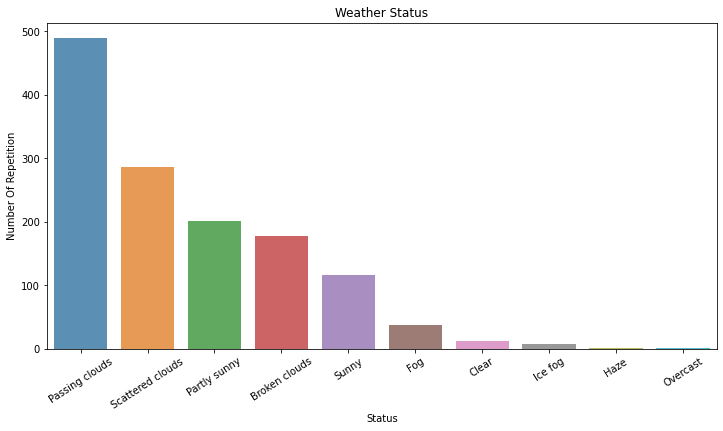

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

weather_counts = data.weather.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(weather_counts.index, weather_counts.values, alpha=0.8)
plt.xticks(rotation=33)
plt.title('Weather Status')
plt.xlabel('Status')
plt.ylabel('Number Of Repetition')
plt.show()

weather에 따른 각각 평균

In [7]:
data.groupby('weather').mean()

,temp,wind,humidity,barometer,day_power
weather,,,,,
Broken clouds,10.181998,15.310286,82.133027,1011.660357,5.570621
Clear,5.722636,8.116907,81.304605,1020.689395,6.846154
Fog,6.177174,10.704615,90.384159,1019.237090,2.052632
Haze,10.177083,6.600379,82.532197,1019.343750,10.500000
Ice fog,-0.906103,10.538184,90.336425,1023.733392,1.428571
Overcast,8.625121,20.191546,83.837198,1020.246860,1.000000
Partly sunny,10.123653,13.657268,80.807391,1015.054063,5.691542
Passing clouds,14.527018,11.277728,68.597444,1017.248357,15.903885
Scattered clouds,12.448292,13.923273,73.915564,1014.160971,12.884615


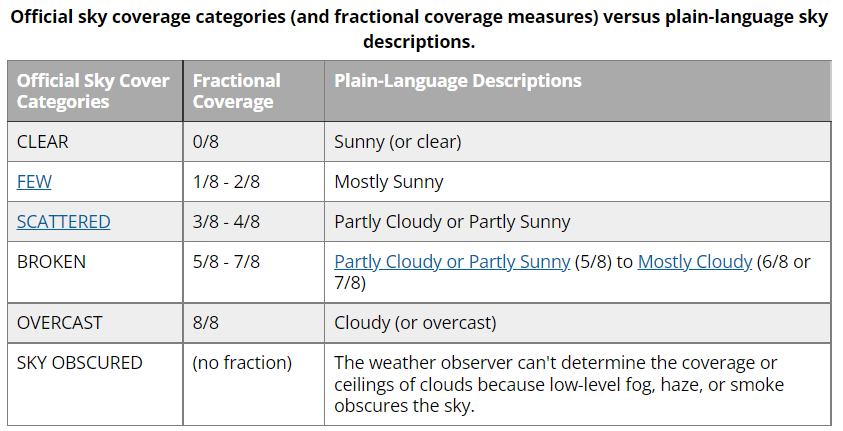

## * 세분화하여 점수화

Clear // Sunny // Partly sunny //Passing clouds // Scattered clouds // Broken clouds// fog, ice fog, haze // overcast  순으로 점수화 진행

In [11]:
data2_re = data.copy()

날씨 status를 점수화로 mapping

In [12]:
result_mapping = {'Clear': 1, 'Sunny' : 2, 'Partly sunny' : 3, 'Passing clouds' : 4, 'Scattered clouds':5, 'Broken clouds':6, 'Fog':7, 'Ice fog':7,'Haze':7, 'Overcast':8}

In [13]:
data2_re['weather'] = data2_re['weather'].map(result_mapping)

In [14]:
data2_re = data2_re.rename(columns={'weather':'cloud cover'})

minmax scailing을 이용하여 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
data2_re2 = data2_re.copy()

In [18]:
data2_re2 = data2_re2.set_index('date')

In [25]:
data2_cloud = data2_re2[['cloud cover']]
data2_re3 = data2_re2.iloc[:, [0,2,3,4,5]]

In [27]:
data2_re3[:] = scaler.fit_transform(data2_re3[:])

<ipython-input-27-825352f35d86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_re3[:] = scaler.fit_transform(data2_re3[:])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [28]:
data2_re3.describe()

,temp,wind,humidity,barometer,day_power
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,0.493488,0.293508,0.621509,0.553194,0.337882
std,0.186860,0.160468,0.159581,0.147282,0.241061
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.347274,0.174399,0.513482,0.466961,0.117647
50%,0.491712,0.270870,0.628314,0.563073,0.294118
75%,0.645286,0.385687,0.742839,0.648581,0.529412
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data2_re3 = pd.concat([data2_re3, data2_cloud], axis=1)
data2_re3

,temp,wind,humidity,barometer,day_power,cloud cover
date,,,,,,
2016-01-01,0.312052,0.234784,0.778769,0.638520,0.058824,2
2016-01-02,0.369939,0.412924,0.725910,0.424439,0.058824,3
2016-01-03,0.352761,0.572187,0.709644,0.296313,0.058824,5
2016-01-04,0.348520,0.334605,0.751113,0.118489,0.029412,3
2016-01-05,0.348466,0.313384,0.735478,0.160241,0.029412,6
...,...,...,...,...,...,...
2019-11-15,0.263113,0.268356,0.786389,0.318577,0.058824,6
2019-11-16,0.252461,0.105177,0.762446,0.423438,0.117647,6
2019-11-17,0.257106,0.103314,0.809187,0.474831,0.088235,2


In [30]:
data2_re3.to_csv('solar_energy_detail.csv', index=False)

In [31]:
from google.colab import files
files.download('solar_energy_detail.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>